In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Load dataset
dataset = pd.read_csv('Crop_recommendation.csv')



In [34]:
# Split dataset into features and target variable
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# Split data into training and testing sets


In [35]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [36]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [48]:
# traning the decision tree classifier 
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
# Predictions on the testing set
y_prediction =model.predict(X_test)
scores1=model.score(X_test,y_test)
scores1,y_prediction


(0.9863636363636363,
 array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
        'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
        'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
        'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
        'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
        'pomegranate', 'mothbeans', 'jute', 'lentil', 'jute', 'blackgram',
        'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
        'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
        'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
        'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'blackgram',
        'watermelon', 'coconut', 'lentil', 'orange', 'papaya',
        'pigeonpeas', 'orange', 'rice', 'muskmelon', 'pigeonpeas',
        'muskmelon', 'coconut', 'jute', 'banana', 'blackgram', 'papaya',
        'banana', 'cotton', 'water

In [45]:
# Train the Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
classifier.fit(X_train, y_train)
scores=classifier.score(X_test,y_test)
# Predictions on the testing set
y_pred = classifier.predict(X_test)
scores,y_pred


(0.990909090909091,
 array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
        'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
        'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
        'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
        'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
        'pomegranate', 'mothbeans', 'jute', 'lentil', 'jute', 'blackgram',
        'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
        'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
        'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
        'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'blackgram',
        'watermelon', 'coconut', 'lentil', 'orange', 'papaya',
        'pigeonpeas', 'orange', 'rice', 'muskmelon', 'pigeonpeas',
        'muskmelon', 'coconut', 'jute', 'banana', 'blackgram', 'papaya',
        'banana', 'cotton', 'waterm

In [42]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
    

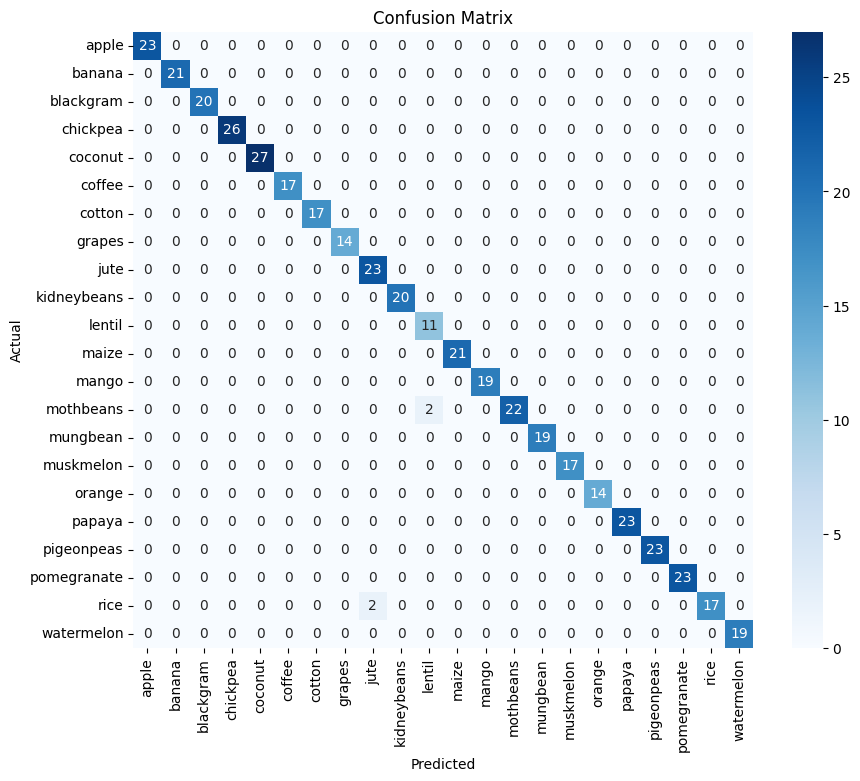

In [43]:
# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [44]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)


Feature Importance:
       Feature  Importance
4     humidity    0.237816
2            K    0.212032
1            P    0.175715
6     rainfall    0.163472
0            N    0.120725
3  temperature    0.050360
5           ph    0.039880
